In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [ ]:
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels=[	"T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt",'Sneaker','Bag','Ankle boot']

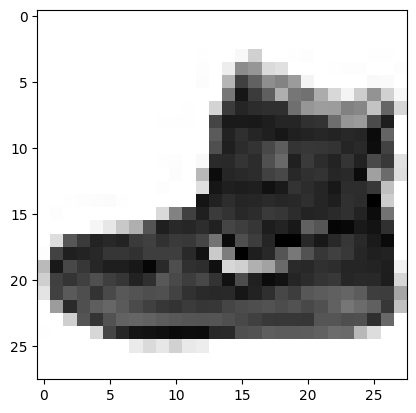

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

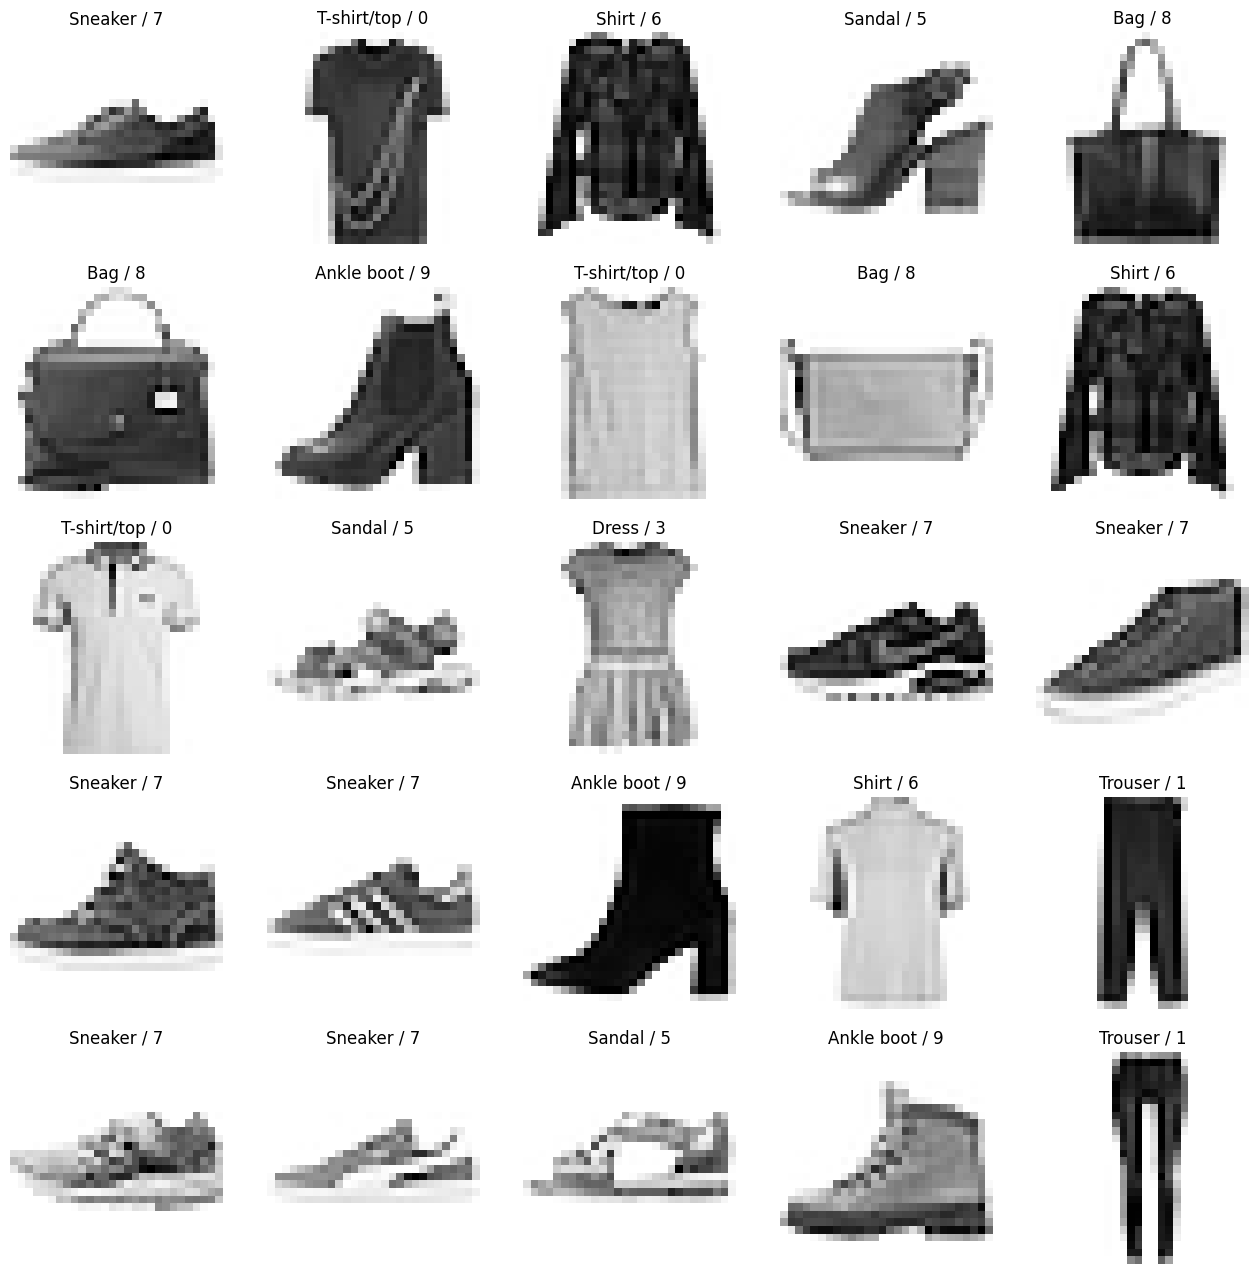

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j=j+1
    plt.imshow(X_train[i],cmap="Greys")
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))


In [ ]:
X_train.ndim

3

In [ ]:
X_train=np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_test=X_test/255
X_train=X_train/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 27s 272ms/step - loss: 0.6406 - accuracy: 0.7817 - val_loss: 0.4444 - val_accuracy: 0.8413
Epoch 2/10
94/94 [==============================] - 27s 283ms/step - loss: 0.3895 - accuracy: 0.8643 - val_loss: 0.3766 - val_accuracy: 0.8676
Epoch 3/10
94/94 [==============================] - 25s 272ms/step - loss: 0.3362 - accuracy: 0.8834 - val_loss: 0.3382 - val_accuracy: 0.8819
Epoch 4/10
94/94 [==============================] - 40s 426ms/step - loss: 0.3059 - accuracy: 0.8908 - val_loss: 0.3240 - val_accuracy: 0.8863
Epoch 5/10
94/94 [==============================] - 37s 392ms/step - loss: 0.2845 - accuracy: 0.8987 - val_loss: 0.3064 - val_accuracy: 0.8928
Epoch 6/10
94/94 [==============================] - 41s 432ms/step - loss: 0.2687 - accuracy: 0.9046 - val_loss: 0.2982 - val_accuracy: 0.8952
Epoch 7/10
94/94 [==============================] - 29s 301ms/step - loss: 0.2524 - accuracy: 0.9096 - val_loss: 0.2844 - val_accuracy: 0.9011

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 10ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.26, 0.08, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2747 - accuracy: 0.8961


[0.27465856075286865, 0.8960999846458435]

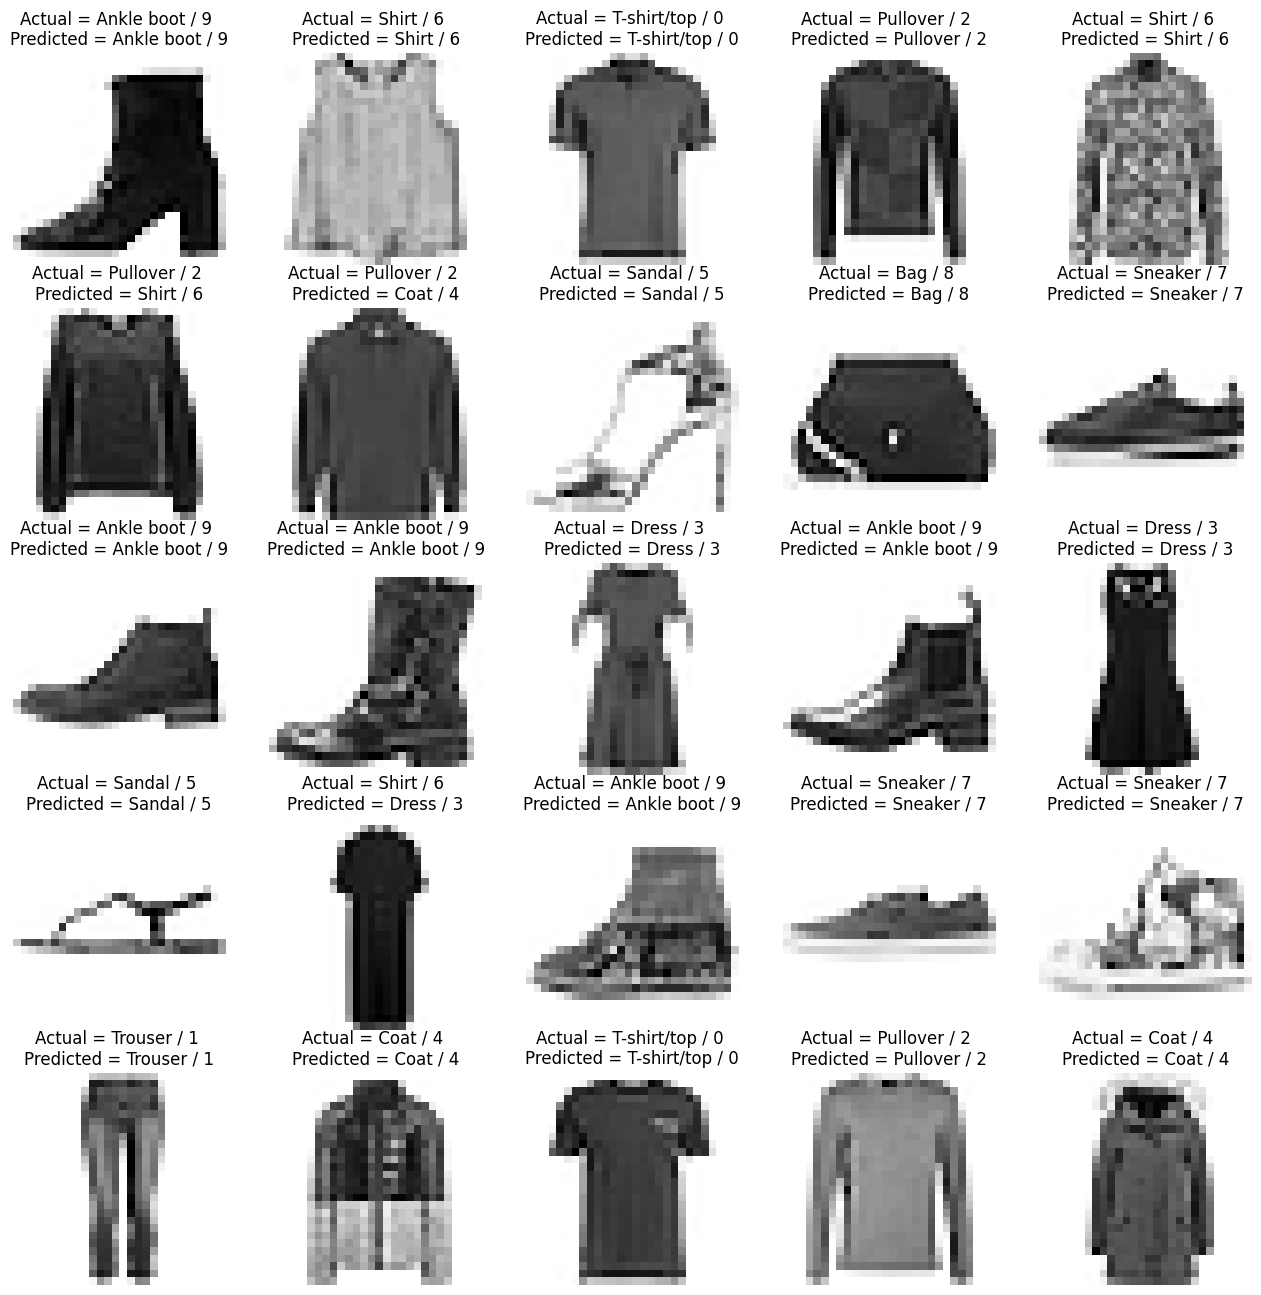

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

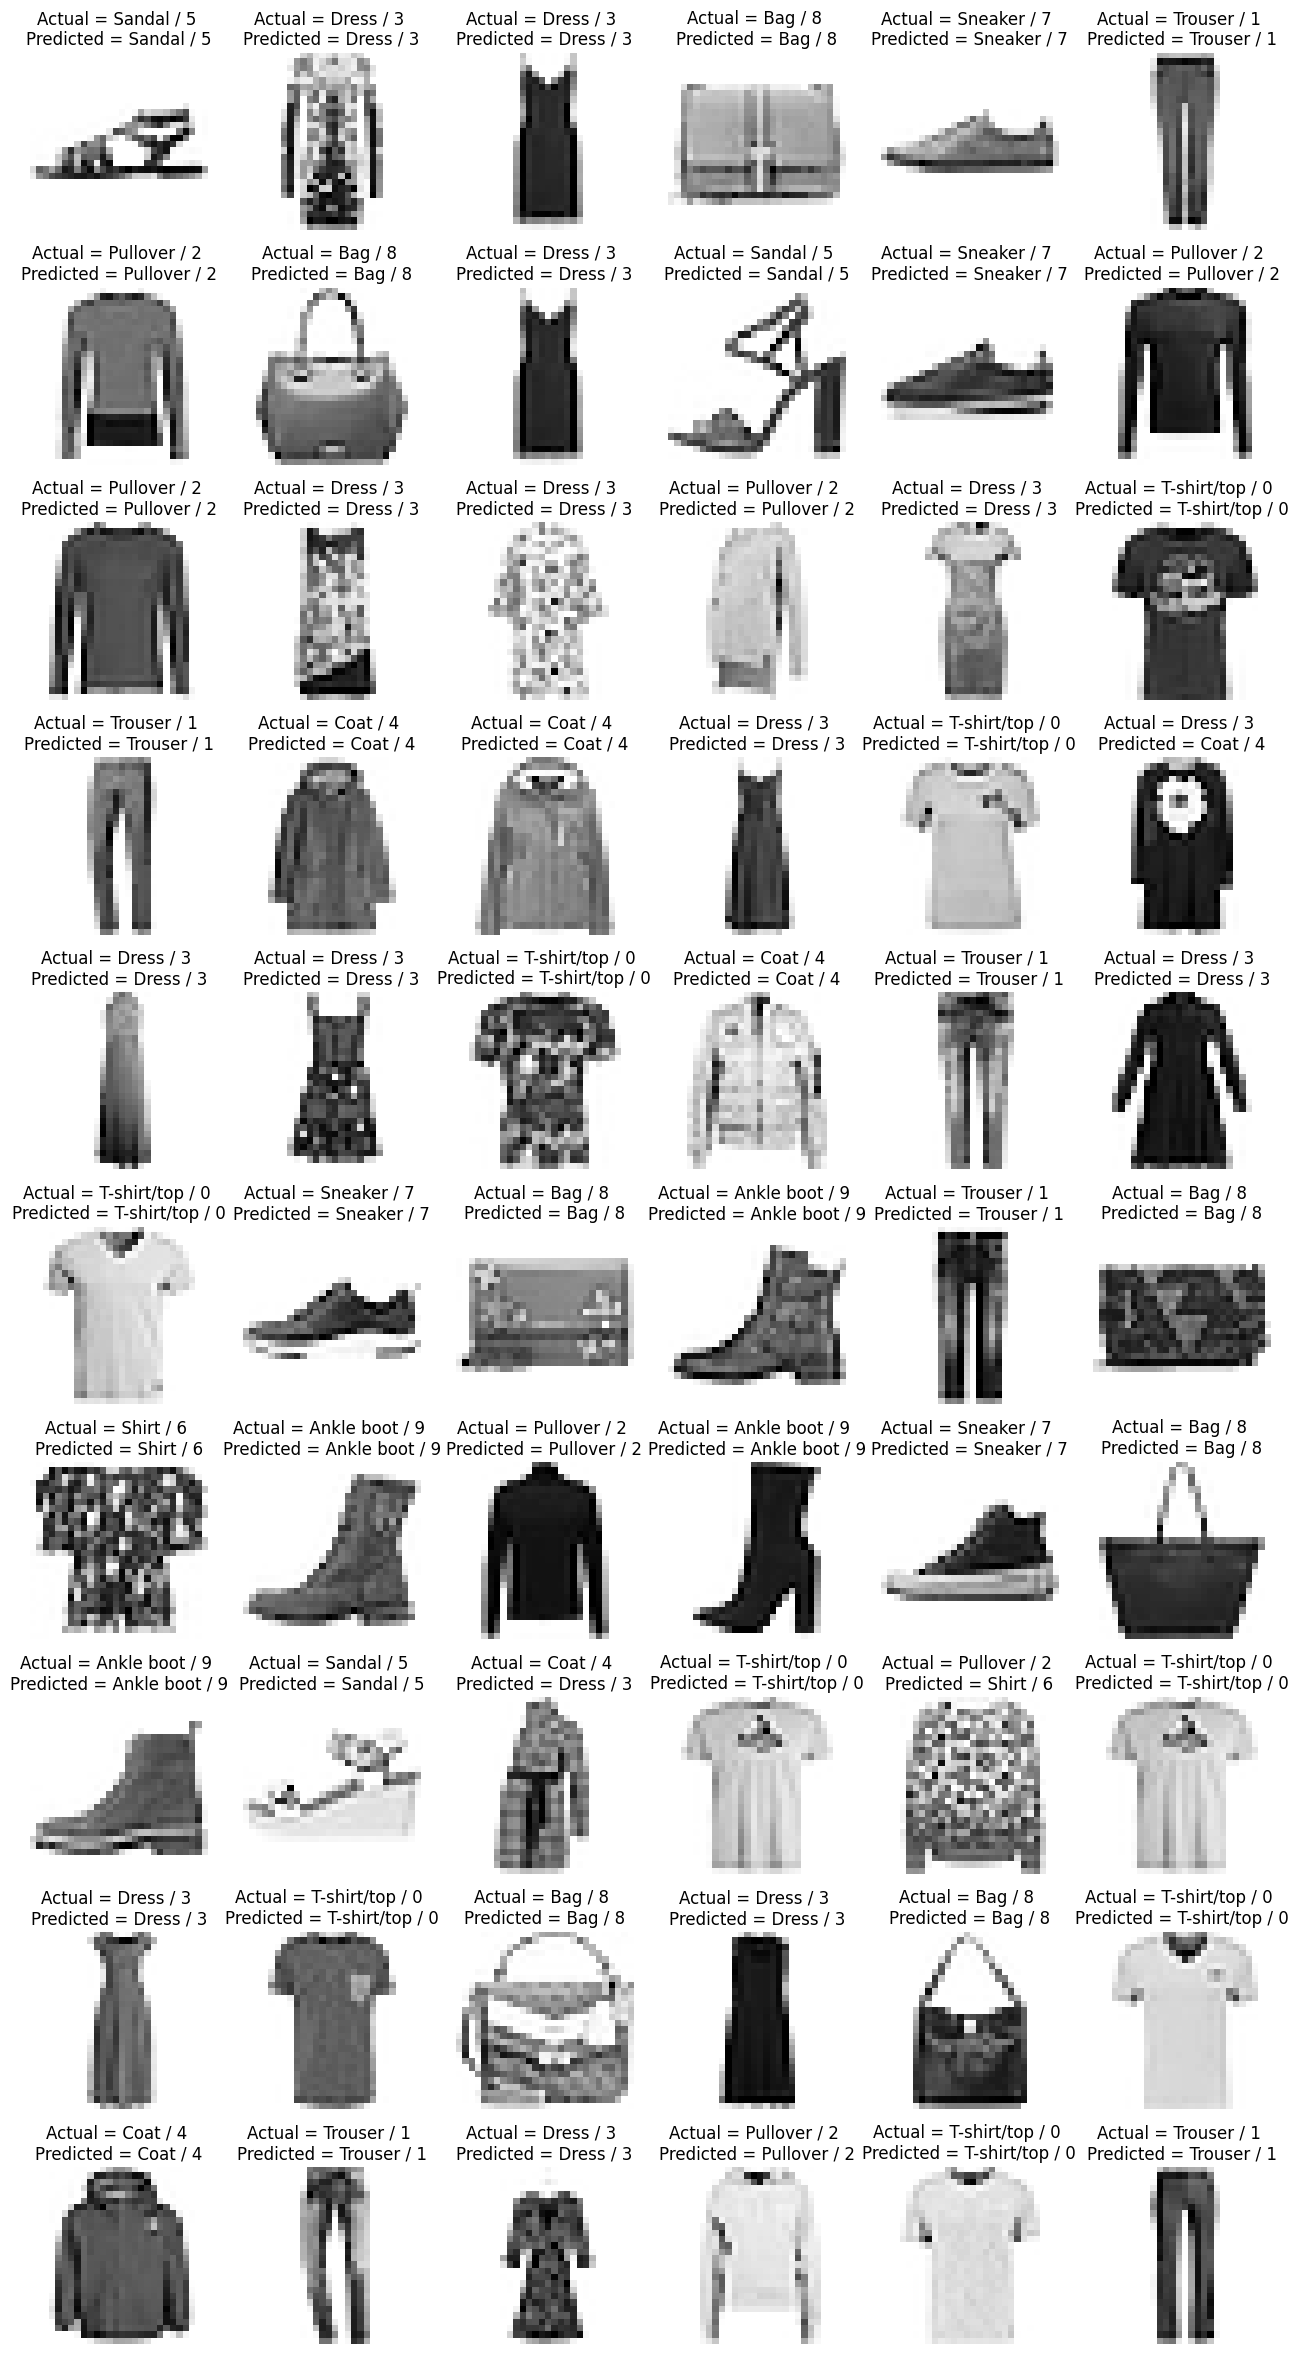

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.89      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.86      0.83      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.82      0.86      0.84      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.80      0.61      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



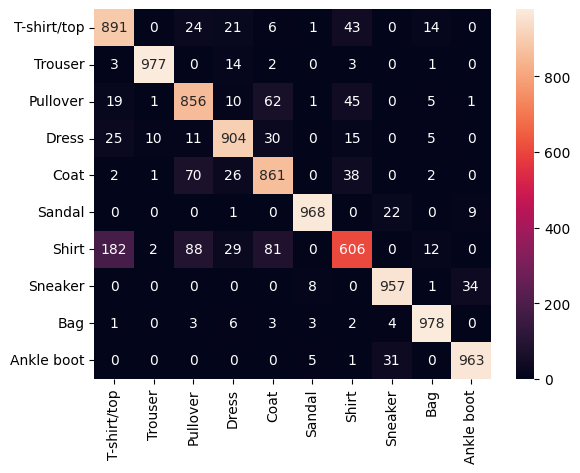

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

In [ ]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

"""######## very complex model"""

#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test, y_test)


Epoch 1/20
94/94 [==============================] - 30s 304ms/step - loss: 1.0358 - accuracy: 0.6133 - val_loss: 0.5824 - val_accuracy: 0.7786
Epoch 2/20
94/94 [==============================] - 33s 357ms/step - loss: 0.5480 - accuracy: 0.7928 - val_loss: 0.4628 - val_accuracy: 0.8281
Epoch 3/20
94/94 [==============================] - 29s 313ms/step - loss: 0.4558 - accuracy: 0.8322 - val_loss: 0.4100 - val_accuracy: 0.8474
Epoch 4/20
94/94 [==============================] - 28s 300ms/step - loss: 0.4060 - accuracy: 0.8520 - val_loss: 0.3646 - val_accuracy: 0.8632
Epoch 5/20
94/94 [==============================] - 29s 313ms/step - loss: 0.3686 - accuracy: 0.8647 - val_loss: 0.3426 - val_accuracy: 0.8742
Epoch 6/20
94/94 [==============================] - 30s 317ms/step - loss: 0.3381 - accuracy: 0.8754 - val_loss: 0.3272 - val_accuracy: 0.8798
Epoch 7/20
94/94 [==============================] - 29s 314ms/step - loss: 0.3188 - accuracy: 0.8839 - val_loss: 0.3105 - val_accuracy: 0.8832

[0.4549770653247833, 0.9027000069618225]